## Coding a GPT to analyze data.


This Jupyter Notebook contain the starter code for you to upload data and generate a narrative using a simplified version of a GPT. You will utilize the `pandas` library to convert the dataframe to a format that the GPT you will use can interpret. Next you will use the `OpenAI` library and the `groq` API to train you model to generate a narrative from the data.

To facilitate your analysis, this notebook contains a complete working example which considers a [video games sales dataset](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset) taken from Kaggle. The code as presented aims to utilize a GPT to analyze global video game sales.


After reviewing and running the code provided, replace the dataset shown with one more pertinent to the use case you chose and adapt the code presented accordingly.

**We strongly advice that you review and understand the code presented in this example before proceding with any modifications.**





#### The Dataset

The dataset presented in this example contains a list of video games with global sales greater than 100,000 copies. The fields in this dataset include:

- Rank: The ranking of overall sales
- Name: The name of the video game
- Platform: The platform of the games release (i.e. PC,PS4, etc.)
- Year: The year of the game's release
- Genre: The genre of the game
- Publisher: The publisher of the game
- NA_Sales: Sales in North America (in millions)
- EU_Sales: Sales in Europe (in millions)
- JP_Sales: Sales in Japan (in millions)
- Other_Sales: Sales in the rest of the world (in millions)
- Global_Sales: Total worldwide sales.


Load the dataset we provided to Google Colab. To upload the dataset, follow the steps below:

- In the menu on the left, click on the "Files" icon.








- Click on the "Upload to session storage" button.


- Using the next modal, select the dataset you intend to use from your local machine and click on "Upload". To run the example in this notebook, select the `vgsales.csv` file.




Once the dataset is loaded in Google Colab, run the code cell below.



In [ ]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from groq import Groq
from IPython.display import Markdown

# Sample dataset to feed the program
data = pd.read_csv('../data/vgsales.csv')

It's always a good idea to take a look at the first five rows of the dataset to visualize the type of data that it contains.

Run the code cell below to vizualize the first five rows of the dataset:

In [2]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Total Sale Calculation


In this example, we are interested in analyzing the global sales for each genre of videogames. To access this information, below we use the `groupby` function on the `data` dataframe to calculate the total `Global_Sales` for each `Genre` of video games. Next, we assign the result to the dataframe `total_sales` below.


Once you are done, run the code cell below.


In [3]:

total_sales = data.groupby('Genre')['Global_Sales'].sum().reset_index()

total_sales

,Genre,Global_Sales
0,Action,1751.18
1,Adventure,238.92
2,Fighting,448.91
3,Idea Factory,0.00
4,Misc,809.96
5,Platform,831.37
6,Puzzle,244.95
7,Racing,732.04
8,Role-Playing,927.37
9,Shooter,1037.37


#### Data Preparation

GPT requires the data we want to analyze to be in string format.

Below, we convert the `total_sales` dataframe to a string format by using the `to_string` function on the `total_sales` dataframe. Additionally, to ensure that the  data is formatted correctly, we use the `replace` function with argument `'\n', ' '` to delete any newline characters.

Run the code cell below.

Once again, adapt this code based on your use case.


In [4]:
data_string = total_sales.to_string(index=False).replace('\n', ' ')
data_dict = {"data": data_string}

data_dict

{'data': '                      Genre  Global_Sales                      Action       1751.18                   Adventure        238.92                    Fighting        448.91                Idea Factory          0.00                        Misc        809.96                    Platform        831.37                      Puzzle        244.95                      Racing        732.04                Role-Playing        927.37                     Shooter       1037.37                  Simulation        392.20 Sony Computer Entertainment          0.00                      Sports       1330.93                    Strategy        175.12'}

[Back to top](#-Index)



#### Obtaining Your OpenAI API Key


To use the OpenAI library, you are required to obtain an API key. You will obtain a free API key from Groq. To access Groq and get your personal API key, follow the steps below:

1. **Create an OpenAI Account:**
Visit the [Groq website](https://console.groq.com/login) and sign up if you don't already have an account.
2. **Log In:**
Log in using your credentials at the Groq platform.
3. **Navigate to the API Dashboard:**
Once logged in, navigate to the [Groq playground](https://console.groq.com/playground).
4. **Generate an API Key:**
In the menu on the left, click on `API Keys`, then click on the `Create API key` button. Enter a name for your API key and click on `Submit`. Copy your API key and store it in a secure place.


You can now use this API key in your applications to authenticate requests to OpenAI's API.

In the code cell below,  replace the string `"your_key"` with your personal API key and run the code cell.

In [ ]:
client = Groq(
    api_key=os.environ['GROQ_API_KEY'],
)

[Back to top](#-Index)



#### Generating the Text Narrative from Your Data


The code in cell below generates a narrative based on the data in the dataframe using OpenAI.

The code below contains the following elements:

- The `chat.completions.create()` method is used on the `client` object to send a chat request and receive a response.
- Inside the `chat.completions.create()` method, the parameter `messages` defines the conversation history or prompt that will be sent to the model equal to `{"role": "user", "content":  f"Analyze the following data: {data_object['data']}"}`.
- Inside the `chat.completions.create()` method, the parameter `model` is set equal to `"llama3-8b-8192"`, a popular GPT model.

Finally, this object is assigned to the `chat_completion` variable below.

In [6]:

chat_completion = client.chat.completions.create(
    messages=[
        {"role": "user", "content":  f"Analyze the global sales column: {data['Global_Sales']}"}
    ],
    model="llama-3.3-70b-versatile",
)

narrative = chat_completion.choices[0].message.content

#narrative.replace('\n', ' ')
Markdown(narrative)

**Global Sales Analysis**

The provided data column, `Global_Sales`, appears to be a pandas Series with 16598 entries, ranging from index 0 to 16597. The values in this column are floating-point numbers representing global sales figures.

**Key Observations:**

1. **Highly skewed distribution**: The values in the `Global_Sales` column are highly skewed, with a few large values and many smaller values. This is evident from the large difference between the highest value (82.74) and the lowest values (0.01).
2. **Decreasing trend**: The values in the column seem to decrease as the index increases. The highest value is at index 0, and the values gradually decrease to very small numbers towards the end of the column.
3. **Long tail**: The distribution of values has a long tail, with many small values clustering around 0.01.

**Potential Insights:**

1. **Top-performing products**: The high values at the beginning of the column might represent top-performing products or best-selling items, which could be of interest for business strategy and marketing purposes.
2. **Low-performing products**: The many small values towards the end of the column might represent low-performing products or items that are not selling well. This could indicate areas for improvement or potential candidates for discontinuation.
3. **Market trends**: The decreasing trend in the column might reflect changes in market trends, consumer behavior, or economic conditions.

**Further Analysis:**

To gain more insights from this data, you could consider the following:

1. **Summary statistics**: Calculate summary statistics such as mean, median, and standard deviation to better understand the distribution of values.
2. **Visualization**: Plot the data to visualize the distribution and identify any patterns or outliers.
3. **Correlation analysis**: Explore the relationship between `Global_Sales` and other relevant variables, such as regional sales, marketing expenses, or product categories.
4. **Time-series analysis**: If the data has a temporal component, analyze the sales trends over time to identify seasonal patterns or anomalies.

## Adapt your code

Now that you have understood how to utilize `OpenAI` and an `API` key to generate a GPT output from a dataframe, replace the dataset in this noebook with one you chose for your use case.

Adapt the code accordingly and use your API keys and `OpenAI` to analize the data in your dataset.

Maximum Sales: 1751.18
Minimum Sales: 0.0
Number of Entries: 14


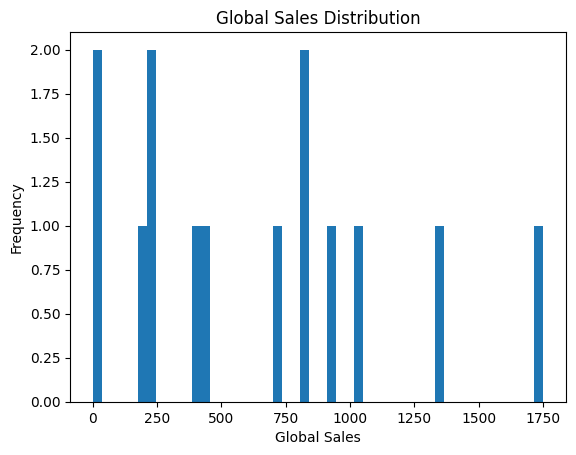

In [7]:
df = total_sales

# Calculate key statistics
max_sales = df['Global_Sales'].max()
min_sales = df['Global_Sales'].min()
num_entries = len(df)

print(f"Maximum Sales: {max_sales}")
print(f"Minimum Sales: {min_sales}")
print(f"Number of Entries: {num_entries}")

# Plot the sales distribution (optional)
df['Global_Sales'].plot.hist(bins=50)
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.title('Global Sales Distribution')
plt.show()